## Imports

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Number of files : 663
Number of files : 663
Shape of the input data: 
torch.Size([16, 3, 256, 256]) torch.Size([16, 1, 256, 256])
Min and Max of the input data: 
tensor(-1.) tensor(1.) tensor(0.) tensor(1.)


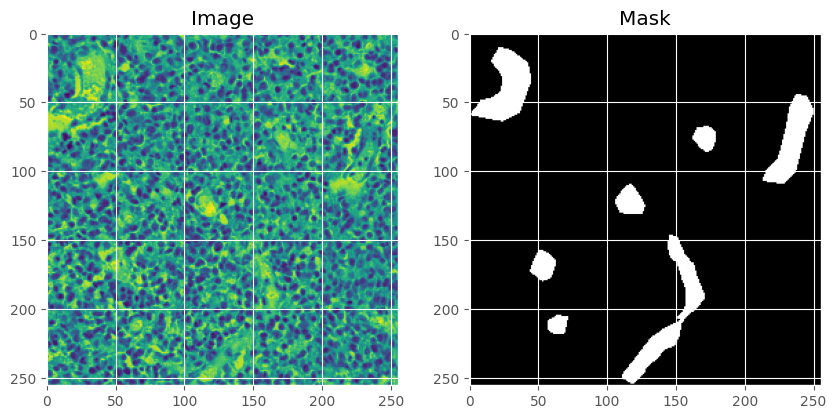

Shape of the input data: 
torch.Size([16, 3, 256, 256]) torch.Size([16, 1, 256, 256])
Min and Max of the input data: 
tensor(-1.) tensor(1.) tensor(0.) tensor(1.)


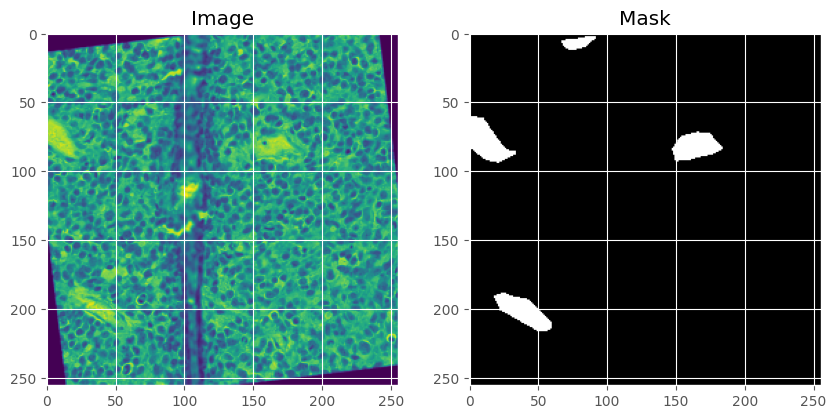

Shape of the input data: 
torch.Size([16, 3, 256, 256]) torch.Size([16, 1, 256, 256])
Min and Max of the input data: 
tensor(-1.) tensor(1.) tensor(0.) tensor(1.)


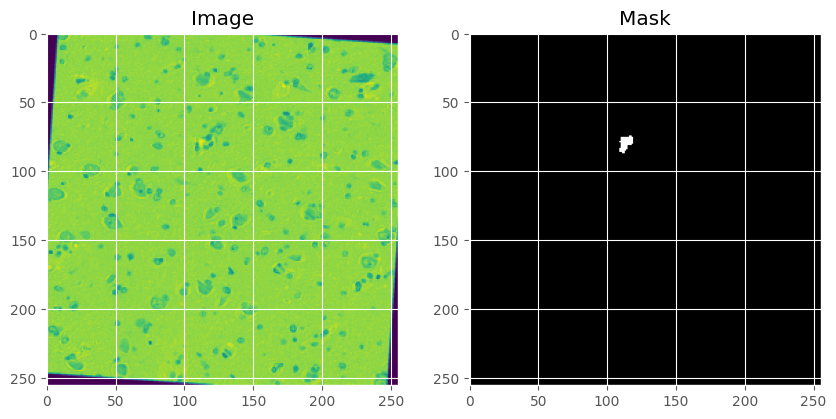

Shape of the input data: 
torch.Size([16, 3, 256, 256]) torch.Size([16, 1, 256, 256])
Min and Max of the input data: 
tensor(-1.) tensor(1.) tensor(0.) tensor(1.)


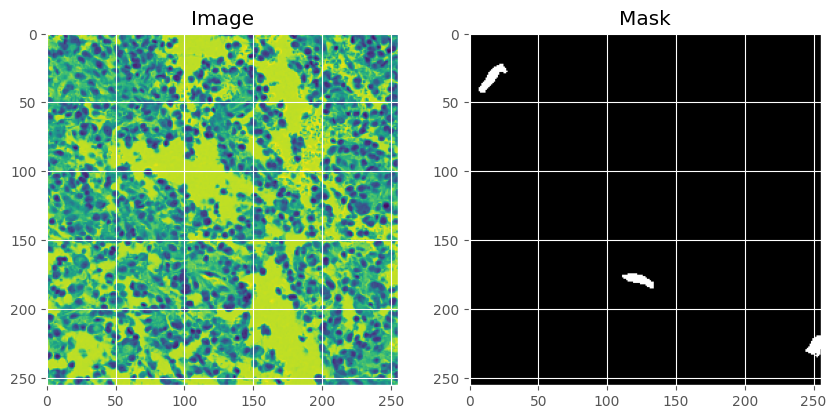

In [33]:
import torch
from torch.utils.data import DataLoader
from Model.DataLoader import DataLoaderManager

image_size = 256
batch_size = 16
train_size = 0.8

dataset = DataLoaderManager(
    root_dir="../patches", kidney_dir=None, data_augmentation=True, shape=(image_size,image_size), 
    test_dir="../patches/patches_test/patches_anno_medecin_bvd_mask"
)

train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset.show_data(train_loader)


## Comparing curves

In [2]:
model_with_bce = torch.load("../res/model_metrics/model_with_bce/model_ENB3_BCE_balanced_augmented_3D")
model_wtih_bce_50 = torch.load("../res/model_metrics/model_with_bce_50/model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_bce_dice = torch.load("../res/model_metrics/model_with_bce_dice/model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_bce_dice_1e3 = torch.load("../res/model_metrics/model_with_bce_dice_1e3/model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_bce_dice_1e5 = torch.load("../res/model_metrics/model_with_bce_dice_1e5/model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_bce_dice_50 = torch.load("../res/model_metrics/model_with_bce_dice_50/model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_bce_dice_b8 = torch.load("../res/model_metrics/model_with_bce_dice_b8/model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_bce_dice_b32 = torch.load("../res/model_metrics/model_with_bce_dice_b32/model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_bce_dice_inv = torch.load("../res/model_metrics/model_with_bce_dice_inv/model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_bce_dice_no_aug = torch.load("../res/model_metrics/model_with_bce_dice_no_aug/model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_bce_dice_no_weight = torch.load("../res/model_metrics/model_with_bce_dice_no_weight/model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_focal_dice = torch.load("../res/model_metrics/model_with_focal_dice/model_ENB3_FOCAL_DICE_balanced_augmented_3D")
model_with_tswerky = torch.load("../res/model_metrics/model_with_tswerky/model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_bce_focal_dice = torch.load("../res/model_metrics/model_with_bce_focal_dice/model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_bce_focal_dice_inv = torch.load("../res/model_metrics/model_with_bce_focal_dice/inv_model_ENB3_BCE_DICE_balanced_augmented_3D")
model_with_bce_focal_dice_no_weight = torch.load("../res/model_metrics/model_with_bce_focal_dice/model_ENB3_BCE_DICE_balanced_augmented_3D_no_weight")
model_with_focal_dice_MIT = torch.load("../res/model_metrics/model_with_focal_dice_MIT/model_MITB4_FOCAL_DICE_balanced_augmented_3D")
model_with_focal_dice_RES = torch.load("../res/model_metrics/model_with_focal_dice_res/model_RES34_FOCAL_DICE_balanced_augmented_3D")

In [12]:
def calculate_f1score(precision, recall):
    precision = np.array(precision)
    recall = np.array(recall)
    return 2 * (precision * recall) / (precision + recall)

def get_metrics(model):
    precision = model["validation"]["precision"]
    recall = model["validation"]["recall"]
    f1_score = calculate_f1score(precision=precision, recall=recall)
    loss = model["validation"]["loss"]
    return precision, recall, f1_score, loss



[0.49626993 0.58109331 0.6129435  0.61132807 0.64702179 0.6613877
 0.65274748 0.6275842  0.64514242 0.6650069  0.67090576 0.6616748
 0.67115868 0.66342807 0.65531945 0.64570303 0.65753883 0.67077373
 0.67106355 0.68018672 0.64098304 0.67296315 0.65452    0.67657612
 0.66903183 0.6745735  0.66162897 0.66831713 0.68116487 0.66810848
 0.68611568 0.69958394 0.69132736 0.69925807 0.68176758 0.67844259
 0.67505196 0.67564454 0.68999404 0.67891747 0.69169886 0.67815227
 0.66218228 0.67103295 0.69223714 0.69684172 0.69396815 0.67910523
 0.67670897 0.67644536]
[0.02125638 0.02501937 0.03294524 0.03941136 0.05052637 0.06025084
 0.0698723  0.07793853 0.08848996 0.10383034 0.1182438  0.13128207
 0.14776576 0.15999244 0.17898099 0.18955327 0.21699763 0.23495933
 0.23888085 0.26421867 0.29023586 0.3174412  0.33658629 0.37461178
 0.40222083 0.40781649 0.43933386 0.43883248 0.45341689 0.46852885
 0.46896203 0.49025701 0.48704409 0.49401481 0.4955184  0.50695294
 0.51464215 0.50764749 0.51422253 0.5224

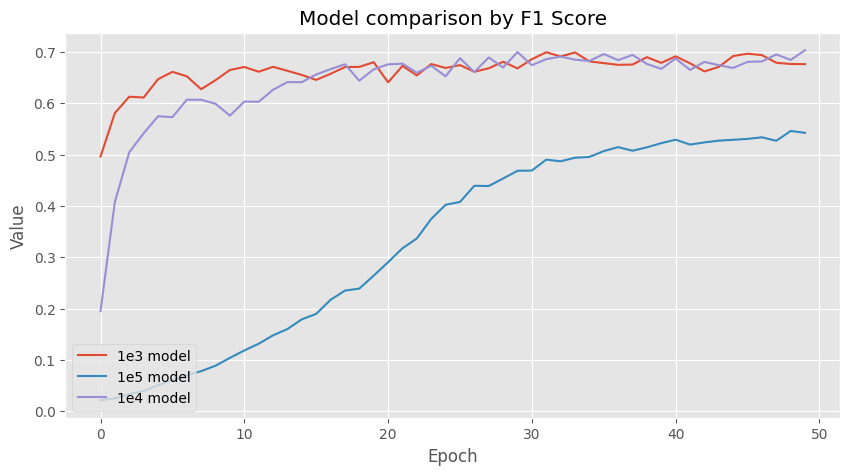

In [28]:
def plot_curves(models):
    plt.style.use("ggplot")
    plt.figure(figsize=(10, 5))
    for model, label in models:
        precision, recall, f1_score , loss= get_metrics(model)
        print(f1_score)
    
        # plt.plot(precision, label="Precision")
        # plt.plot(recall, label="Recall")
        plt.plot(f1_score, label=(label + " model"))
    # set the position to bottom left
    plt.legend(loc="lower left")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Model comparison by F1 Score")
    plt.show()



model_to_compare = [
    [model_with_bce_dice_1e3, "1e3"],
    [model_with_bce_dice_1e5, "1e5"],
    [model_with_bce_dice_50, "1e4"],
]
plot_curves(model_to_compare)

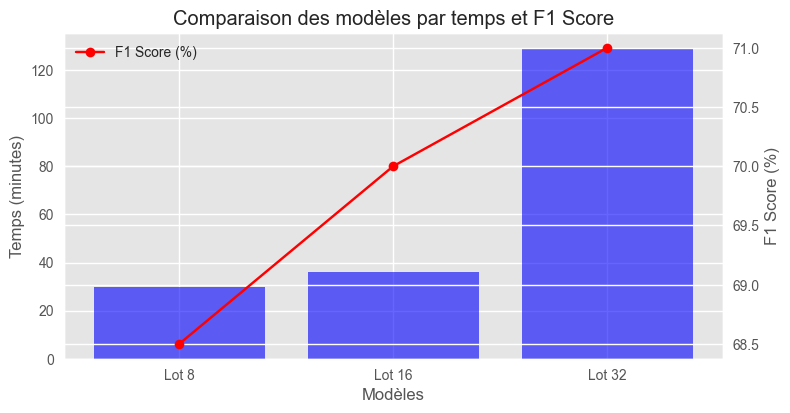

In [48]:
import matplotlib.pyplot as plt
import numpy as np


plt.style.use('ggplot')
# Example data
times = np.array([30, 36, 129])  # Time for each model in minutes
accuracies = np.array([68.5, 70, 71])  # Accuracy for each model in percent

# Labels for models
models = ['Lot 8', 'Lot 16', 'Lot 32']

# Dual-axis Bar Chart
fig, ax1 = plt.subplots(figsize=(8, 4))

# Bar chart for the times
ax1.bar(models, times, color='b', alpha=0.6, label='Time (minutes)')
ax1.set_xlabel('Modèles')
ax1.set_ylabel('Temps (minutes)')
ax1.tick_params('y')

# Create a second y-axis for the accuracies
ax2 = ax1.twinx()
ax2.plot(models, accuracies, color='r', marker='o', label='F1 Score (%)')  # Line plot for accuracy
ax2.set_ylabel('F1 Score (%)')
ax2.tick_params('y')

fig.tight_layout()
plt.title('Comparaison des modèles par temps et F1 Score')
plt.legend(loc='upper left')
plt.show()
